<a href="https://colab.research.google.com/github/Andreaierardi/SocialNetworkAnalysis-project/blob/main/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Social Network Analysis Project**

> ## **University of Milan** - **DataScience and Economics**

<br>

#### Author : **Andrea Ierardi**

<br>


---




 <br>






## Dataset
### Description

Data collected about Facebook pages (November 2017). These datasets represent blue verified Facebook page networks of different categories. Nodes represent the pages and edges are mutual likes among them.








 <br>






In [1]:
import pandas as pd
nodes = pd.read_csv('https://raw.githubusercontent.com/Andreaierardi/SocialNetworkAnalysis-project/main/dataset/fb-pages-food.csv',sep=";")

edges = pd.read_csv('https://raw.githubusercontent.com/Andreaierardi/SocialNetworkAnalysis-project/main/dataset/fb-pages-food.edges')


In [2]:
edges

,source,target
0,0,276
1,0,58
2,0,132
3,0,603
4,0,398
...,...,...
2097,597,611
2098,601,603
2099,601,616
2100,603,616


In [3]:
nodes

,name,id
0,Josh Marks,386
1,Blue Ribbon Restaurants,473
2,Pat Neely,1
3,La Griglia,542
4,Jose Garces,189
...,...,...
615,Jumia Food,163
616,Luke Thomas,381
617,Clodagh McKenna,140
618,Chef Michelle Bernstein,157


In [4]:
from collections import Counter # Counter counts the number of occurrences of each item
from itertools import tee, count
def uniquify(seq, suffs = count(1)):
    """Make all the items unique by adding a suffix (1, 2, etc).

    `seq` is mutable sequence of strings.
    `suffs` is an optional alternative suffix iterable.
    """
    not_unique = [k for k,v in Counter(seq).items() if v>1] # so we have: ['name', 'zip']
    # suffix generator dict - e.g., {'name': <my_gen>, 'zip': <my_gen>}
    suff_gens = dict(zip(not_unique, tee(suffs, len(not_unique))))  
    for idx,s in enumerate(seq):
        try:
            suffix = str(next(suff_gens[s]))
        except KeyError:
            # s was unique
            continue
        else:
            seq[idx] += suffix
    

In [5]:
names = list(nodes.name)
uniquify(names, (f'_{x!s}' for x in range(1, 100)))
names[0:10]

['Josh Marks',
 'Blue Ribbon Restaurants',
 'Pat Neely',
 'La Griglia',
 'Jose Garces',
 'Zac Kara',
 'Big Fish Seafood Bistro_1',
 'Tom Aikens',
 'The Habit Burger Grill',
 'Chef Sheldon Simeon']

In [6]:
# Find the name of the column by index
n = nodes.columns[0]

# Drop that column
nodes.drop(n, axis = 1, inplace = True)

# Put whatever series you want in its place
nodes[n] = names

list(nodes.name)[0:20]

['Josh Marks',
 'Blue Ribbon Restaurants',
 'Pat Neely',
 'La Griglia',
 'Jose Garces',
 'Zac Kara',
 'Big Fish Seafood Bistro_1',
 'Tom Aikens',
 'The Habit Burger Grill',
 'Chef Sheldon Simeon',
 'Ochikeron',
 'Taco Bell Cyprus',
 'Christophe Michalak',
 "Peohe's",
 'Destino Ibiza',
 'KFC_1',
 'Chef Shirley Chung',
 'Doug Adams',
 'משה שגב / Moshe Segev',
 'Angel Leon Gonzalez']

In [7]:
# Nodes as dictionary
nodes_dict = {}
for (n, id) in zip(nodes["name"],nodes["id"]):
 # print(n, "+", id)
  nodes_dict[id] = n

In [8]:
list(nodes_dict.values())[0:20]

['Josh Marks',
 'Blue Ribbon Restaurants',
 'Pat Neely',
 'La Griglia',
 'Jose Garces',
 'Zac Kara',
 'Big Fish Seafood Bistro_1',
 'Tom Aikens',
 'The Habit Burger Grill',
 'Chef Sheldon Simeon',
 'Ochikeron',
 'Taco Bell Cyprus',
 'Christophe Michalak',
 "Peohe's",
 'Destino Ibiza',
 'KFC_1',
 'Chef Shirley Chung',
 'Doug Adams',
 'משה שגב / Moshe Segev',
 'Angel Leon Gonzalez']


 <br>





## Network Building



In [9]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
G = nx.Graph()

for e in edges.values.tolist():
  G.add_edge(e[0],e[1])

In [11]:
H = nx.relabel_nodes(G, nodes_dict)
len(sorted(H))

G = H

In [12]:
print('Number of nodes: {} - Number of links:{}'.format(G.order(),G.size()))


Number of nodes: 620 - Number of links:2102


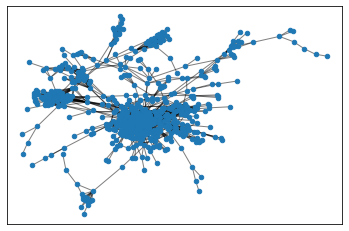

In [13]:
# draw the graph
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=20, label = names)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


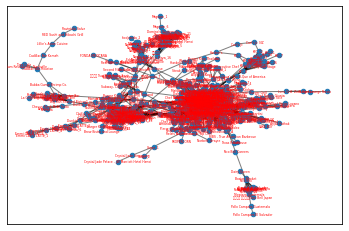

In [14]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# draw the graph with labels
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_size=20, label = names)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G,pos,font_size=3,font_color='r')
plt.show()

In [15]:
node_deg_df =  pd.DataFrame.from_dict(dict(G.degree()),orient="index", columns=['degree']).reset_index()
node_deg_df.columns = ['name','degree']
node_deg_df = nodes.merge(node_deg_df,on='name',)
node_deg_df

,id,name,degree
0,386,Josh Marks,7
1,473,Blue Ribbon Restaurants,7
2,1,Pat Neely,2
3,542,La Griglia,1
4,189,Jose Garces,5
...,...,...,...
615,163,Jumia Food_10,6
616,381,Luke Thomas,1
617,140,Clodagh McKenna,2
618,157,Chef Michelle Bernstein,10


In [20]:
degree = list(dict(G.degree()).values())

percentile_99 = np.percentile(degree,99)
hub_nodi = [k for k,v in dict(G.degree()).items() if v>= percentile_99]


color_map = []
size_map = []
node_index ={}
for i in range(0, len(names)):
    if not (names[i] in hub_nodi) :
        color_map.append('#86b5fb')
        size_map.append(20)
    else: 
        color_map.append('#93e685')

In [ ]:
#!pip install pyvis

In [126]:
from pyvis.network import Network

net = Network(height='100%', width='100%', bgcolor='#222222', font_color='white', notebook =True)

# set the physics layout of the network
net.force_atlas_2based(gravity=-300,spring_length=300)

In [127]:
net.add_nodes(node_deg_df['id'].tolist(), size=node_deg_df['degree'].tolist(),
                         title=node_deg_df['name'].tolist(),
                         label=node_deg_df['name'].tolist(),
                          color=color_map,
              )

In [128]:
for index in range(len(edges['source'])):
  src = int(edges['source'][index])
  dst = int(edges['target'][index])
  net.add_edge(src,dst)



In [129]:
dir(net.options)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'configure',
 'edges',
 'interaction',
 'physics',
 'set',
 'to_json']

In [130]:
net.options.nodes ={"font" : {
          "size" : 50,
          "color" : '#ffffff'
      }}

In [133]:
hub_nodi

['Logan Junior Chef',
 'Robin Miller',
 'Scott Conant',
 "McDonald's_6",
 'Eric Ripert',
 'Alex Guarnaschelli',
 'David Chang',
 'Chef Daniel Boulud']

In [131]:
net.options

{'interaction': {'hideEdgesOnDrag': False, 'hideNodesOnDrag': False, 'dragNodes': True}, 'configure': {'enabled': False}, 'physics': {'enabled': True, 'stabilization': <pyvis.physics.Physics.Stabilization object at 0x7f27b7b77ed0>, 'forceAtlas2Based': <pyvis.physics.Physics.forceAtlas2Based object at 0x7f27b7dac990>, 'solver': 'forceAtlas2Based'}, 'edges': {'smooth': {'enabled': False, 'type': 'continuous'}, 'color': {'inherit': True}}, 'nodes': {'font': {'size': 50, 'color': '#ffffff'}}}

In [132]:
net.show('base_network.html')


 <br>

# Degree Analysis

In [337]:
list(G.nodes())[0:20]

['Lee Anne Wong',
 'KFC_3',
 'Chef Jamie Gwen',
 'Madison Cowan',
 'Elizabeth Karmel',
 'KFC_22',
 'KFC_8',
 'Pat Neely',
 'Logan Junior Chef',
 'Robin Miller',
 'Ben Sargent & Dr. Klaw',
 'Bobby Flay',
 'Chuck Hughes',
 'Chef Carlo Cracco',
 'Pasqualino Barbasso',
 'Alessandro Borghese',
 'Chef Hirohiko Shoda',
 'Alain Ducasse',
 'Christian Bau',
 'Andy Luotto']

In [338]:
density = nx.density(G)
print('Density: {}'.format(density))

Density: 0.0109541925061233


In [339]:
degree = list(dict(G.degree()).values())
degree[0:20]

[6, 11, 15, 2, 27, 9, 17, 2, 134, 47, 3, 31, 11, 10, 7, 10, 7, 19, 7, 3]

In [340]:
print('Standard deviation: {}'.format(np.std(degree)))
print('Mean: {}'.format(np.mean(degree)))
print('Median: {}'.format(np.median(degree)))
print('Min: {}'.format(np.min(degree)))
print('Max: {}'.format(np.max(degree)))


print("Assortativity coefficient: " + str(nx.degree_assortativity_coefficient(G)))

Standard deviation: 9.46914920573866
Mean: 6.780645161290322
Median: 4.0
Min: 1
Max: 134
Assortativity coefficient: -0.028203795222469928


Text(0.5, 0, 'Degree')

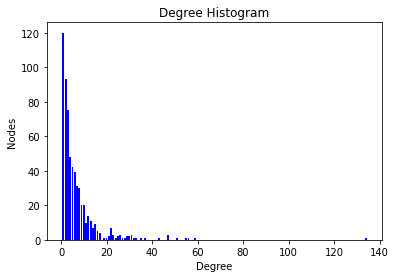

In [341]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.bar(deg, cnt, width=0.8, color="b")
plt.title("Degree Histogram")
plt.ylabel("Nodes")
plt.xlabel("Degree")
#in_hist= [in_degrees.values().count(x) for x in in_values]

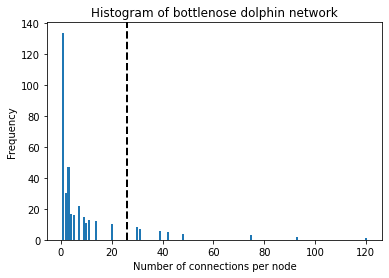

In [342]:
plt.bar(x =cnt, height= deg)
plt.axvline(np.array(deg).mean(), color='k', linestyle='dashed', linewidth=2)
plt.title("Histogram of bottlenose dolphin network")
plt.xlabel('Number of connections per node')
plt.ylabel('Frequency')
plt.show()

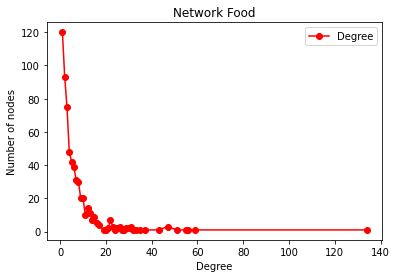

In [343]:
plt.figure() # you need to first do 'import pylabas plt'plt.grid(True)
plt.plot(deg,cnt,"ro-") # degree
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Network Food')
plt.show()

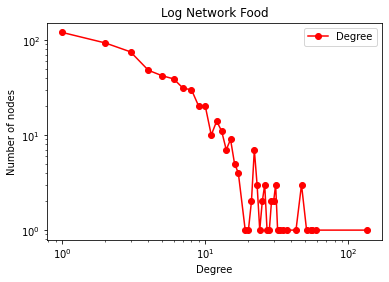

In [344]:
plt.figure() # you need to first do 'import pylabas plt'plt.grid(True)
plt.loglog(deg,cnt,"ro-") # degree
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Log Network Food')
plt.show()


 <br>

### ECDF

Text(0, 0.5, 'ECDF Food')

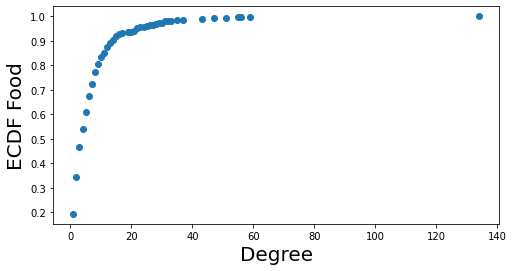

In [345]:
# ECDF linear scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.plot(x,y,marker='o',ms=6, linestyle='None')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF Food', size = 20)

Text(0, 0.5, 'ECDF Food')

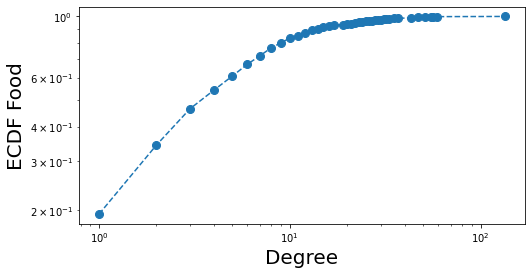

In [346]:

# ECDF loglog scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF Food', size = 20)


Text(0, 0.5, 'ECCDF FOOD')

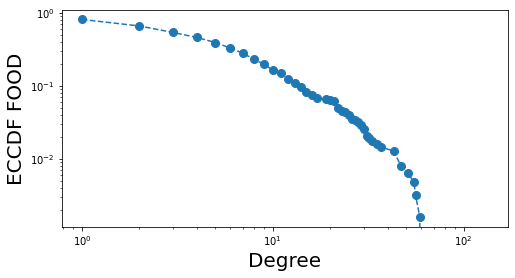

In [347]:
# ECCDF
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF FOOD', size = 20)

In [348]:
p = density
random_graph = nx.fast_gnp_random_graph(G.order(),p)


In [349]:
print('Number of nodes: {}'.format(random_graph.order()))
print('Number of links: {}'.format(random_graph.size()))

Number of nodes: 620
Number of links: 2112


In [350]:
random_degree = list(dict(random_graph.degree()).values())
print('Random Net Standard deviation: {}'.format(np.std(random_degree)))
print('Random Net Mean: {}'.format(np.mean(random_degree)))
print('Random Net Median: {}'.format(np.median(random_degree)))
print('Random Net Min: {}'.format(np.min(random_degree)))
print('Random Net Max: {}'.format(np.max(random_degree)))

Random Net Standard deviation: 2.535648028831807
Random Net Mean: 6.812903225806451
Random Net Median: 7.0
Random Net Min: 0
Random Net Max: 16


Text(0, 0.5, 'ECCDF')

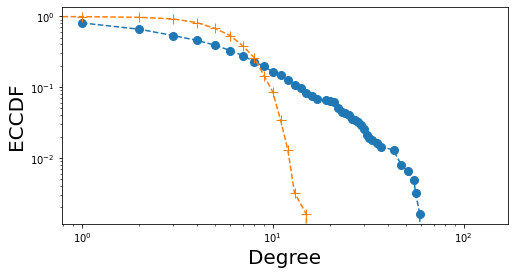

In [351]:
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)

cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

fig_cdf_fb = plt.figure(figsize=(8,4))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.loglog(x_random,1-y_random,marker='+',ms=10, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)


 <br>

## HUBS

In [352]:
percentile_99 = np.percentile(degree,99)
print(percentile_99)

47.0


In [353]:
hub_nodi = [k for k,v in dict(G.degree()).items() if v>= percentile_99]


In [354]:
print(len(hub_nodi))
print(list(hub_nodi))

8
['Logan Junior Chef', 'Robin Miller', 'Scott Conant', "McDonald's_6", 'Eric Ripert', 'Alex Guarnaschelli', 'David Chang', 'Chef Daniel Boulud']


In [355]:
print(list(nx.isolates(G)))


[]


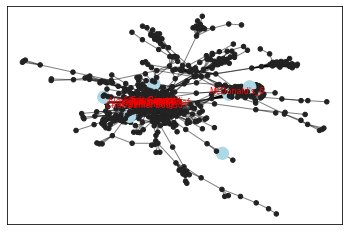

In [364]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
color_map = []
size_map = []
node_index ={}
for i in range(0, len(names)):
    if not (names[i] in hub_nodi) :
        color_map.append('#222222')
        size_map.append(20)
    else: 
        color_map.append('lightblue')
        size_map.append(150)
        node_index[names[i]] = names[i]
nx.draw_networkx_nodes(G, pos, node_size=size_map
                       , node_color=color_map)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G,labels=node_index,pos = pos,font_size=8,font_color='r')

plt.show()


 <br>

## Connectivity

In [ ]:
print(nx.is_connected(G))
print(nx.number_connected_components(G))

True
1


In [ ]:
nx.number_connected_components(G)

1

In [ ]:
#dir(G)

In [ ]:
len(nx.triangles(G))

620


 <br>

## Clusters

In [ ]:
clusters = nx.average_clustering(G)
clusters

0.3308970263553271

In [ ]:
type(clusters)

float

In [ ]:
nx.transitivity(G)


0.22264084150905228

In [ ]:


local_clustering=nx.clustering(G)
list_local_clustering=list(local_clustering.values())
print('Mean local clustering: {}'.format(np.mean(list_local_clustering)))


Mean local clustering: 0.3308970263553272


In [ ]:
local_cluster = nx.clustering(G)
sorted(local_cluster.items(), key=lambda item: item[1], reverse= False)

[('Madison Cowan', 0),
 ('Jock Zonfrillo', 0),
 ('Steve Konopelski', 0),
 ('Magnum_4', 0),
 ('Magnum_7', 0),
 ('Magnum_1', 0),
 ('Magnum_6', 0),
 ('On The Border', 0),
 ('foodpanda_5', 0),
 ('Big Fernand', 0),
 ('foodpanda_8', 0),
 ("Dunkin' Donuts_10", 0),
 ("Dunkin' Donuts_5", 0),
 ('Subway', 0),
 ("Dunkin' Coffee", 0),
 ('Eckart Witzigmann', 0),
 ('Boston Market', 0),
 ('Dairy Queen', 0),
 ('NishaMadhulika', 0),
 ('Chetna Makan', 0),
 ('Maria Loi', 0),
 ('Dina Nikolaou', 0),
 ('Franklin Becker', 0),
 ('Chef Rick Tramonto', 0),
 ('KFC_2', 0),
 ('foodpanda_2', 0),
 ("McDonald's Vietnam", 0),
 ('Bahama Breeze Island Grille', 0),
 ('Yard House', 0),
 ("Nando's PERi-PERi", 0),
 ('Magnum_3', 0),
 ('Thierry Rautureau', 0),
 ('Chef Guy Martin', 0),
 ('Chef Nina Compton', 0),
 ('Ravintola Salve', 0),
 ('RED Sushi and Hibachi Grill', 0),
 ('Russell Jackson', 0),
 ("McDonald's_48", 0),
 ('Chef Grace Ramirez', 0),
 ('Iginio Massari', 0),
 ('KFC_7', 0),
 ('Kirti Bhoutika', 0),
 ('Cadillac Bar Ho

In [ ]:
triangle = nx.triangles(G)
list(triangle.items())[0:20]
#len(triangle)

[('Lee Anne Wong', 4),
 ('KFC_3', 13),
 ('Chef Jamie Gwen', 36),
 ('Madison Cowan', 0),
 ('Elizabeth Karmel', 88),
 ('KFC_22', 15),
 ('KFC_8', 25),
 ('Pat Neely', 1),
 ('Logan Junior Chef', 461),
 ('Robin Miller', 166),
 ('Ben Sargent & Dr. Klaw', 3),
 ('Bobby Flay', 94),
 ('Chuck Hughes', 11),
 ('Chef Carlo Cracco', 10),
 ('Pasqualino Barbasso', 6),
 ('Alessandro Borghese', 15),
 ('Chef Hirohiko Shoda', 3),
 ('Alain Ducasse', 28),
 ('Christian Bau', 6),
 ('Andy Luotto', 2)]

In [ ]:
print("TOTAL number of triangles in the graph: ", sum(list(nx.triangles(G).values())))

TOTAL number of triangles in the graph:  8805



 <br>

## Centrality



In [ ]:
deg_centr = nx.degree_centrality(G)
sort_orders = sorted(deg_centr.items(), key=lambda x: x[1], reverse=True)

print("10 most important nodes for Degree Centrality:")
for i in range(10):
  print(sort_orders[i])


10 most important nodes for Degree Centrality:
('Logan Junior Chef', 0.21647819063004847)
("McDonald's_6", 0.09531502423263329)
('David Chang', 0.09046849757673668)
('Eric Ripert', 0.0888529886914378)
('Scott Conant', 0.08239095315024234)
('Robin Miller', 0.07592891760904685)
('Alex Guarnaschelli', 0.07592891760904685)
('Chef Daniel Boulud', 0.07592891760904685)
('Chef Kent Graham', 0.06946688206785137)
('Tom Colicchio', 0.05977382875605816)


In [ ]:
betweenesCentrality = nx.betweenness_centrality(G)
sort_orders = sorted(betweenesCentrality.items(), key=lambda x: x[1], reverse=True)
print("10 most important nodes for Betweennes Centrality:")
for i in range(10):
  print(sort_orders[i])


10 most important nodes for Betweennes Centrality:
('Logan Junior Chef', 0.3499076661737777)
("McDonald's_51", 0.1619605706800918)
("McDonald's_6", 0.14456288292404343)
('Subway', 0.09327260616363368)
('Chef Robert Irvine', 0.09141807568331686)
('foodpanda - 空腹熊貓', 0.07911166993681569)
('Dani García', 0.07229884637101391)
('達美樂披薩', 0.05838784338316884)
('Marcus Samuelsson', 0.057229302697032476)
('Chef Lorena Garcia', 0.057020665866287595)


In [ ]:
eigen = nx.eigenvector_centrality(G)
sort_orders = sorted(eigen.items(), key=lambda x: x[1], reverse=True)
print("10 most important nodes for Eigenvector Centrality:")
for i in range(10):
  print(sort_orders[i])


10 most important nodes for Eigenvector Centrality:
('Logan Junior Chef', 0.3257521783526796)
('Scott Conant', 0.2212476362249716)
('Eric Ripert', 0.21990111769744997)
('David Chang', 0.2073087464245374)
('Alex Guarnaschelli', 0.20600750503290316)
('Robin Miller', 0.18493902862814815)
('Chef Kent Graham', 0.17958444309886806)
('Chef Daniel Boulud', 0.17605019181207027)
('Jacques Pépin', 0.16176590042363934)
('René Redzepi', 0.15717739346300846)


In [ ]:
pagerank = nx.pagerank(G)
sort_orders = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("10 most important nodes for Page Rank:")
for i in range(10):
  print(sort_orders[i])

10 most important nodes for Page Rank:
('Logan Junior Chef', 0.025287363082514766)
("McDonald's_6", 0.014547869032715707)
('David Chang', 0.008860842463979819)
('Eric Ripert', 0.008394578695731944)
('Scott Conant', 0.00765590500196909)
('Chef Daniel Boulud', 0.007613723777791042)
('Robin Miller', 0.007566138546930535)
('Dani García', 0.007270498839968533)
("McDonald's_29", 0.007234882262368256)
('Alex Guarnaschelli', 0.007152129703475652)



 <br>

## Communities


In [ ]:
import networkx.algorithms.community as nx_comm

import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

list_community_sets_greedy = list(nx_comm.greedy_modularity_communities(G))
print(list_community_sets_greedy[0:20])

[frozenset({'Suzanne Goin', 'Dina Nikolaou', "'Wichcraft", 'Kirti Bhoutika', 'Pablo Massey', 'Maru Botana', 'Chef Kent Graham', 'Scott Conant', 'Maria Loi', 'Crepes & Waffles', 'Chef Aaron McCargo Jr', 'Cook with Chef Duminda', 'Donato De Santis', 'Angel Leon Gonzalez', 'Quique Dacosta', 'Martín Berasategui', 'Chef Michael Smith', 'Elizabeth Karmel', 'Maneet Chauhan', 'Guga Rocha', 'Doug Adams', 'Bobby Flay', 'Daniel Humm', 'Geoffrey Zakarian', 'Julia Child', 'Chef Alex Levin', 'Gregory Gourdet', 'Chef Ben Churchill', 'Tom Colicchio', 'Marcus Samuelsson', "Chef Claudia's Cocina", 'Jehangir', 'Pedro Lambertini', 'Pat Neely', 'Buddy Valastro', 'Dean Sheremet', 'Logan Junior Chef', 'Virginia Willis', 'Johnny Iuzzini', "Bobby's Burger Palace", 'Chef Brian Duffy', 'Chef Elizabeth Falkner', 'René Redzepi', 'Alex Guarnaschelli', 'Donatella Arpaia', 'Chef Carmen Gonzalez', 'Luke Thomas', 'Chef Casey Thompson', 'Aarón Sánchez', 'Diego Guerrero', 'Chef Mark Garcia', 'Chef Rick Tramonto', 'Chef B

In [ ]:
partition_greedy = {}
for i, comm in enumerate(list_community_sets_greedy):
    print("Community:", i)
    print("Number of elems",len(comm))
    for n in comm:
        partition_greedy[n]=i

Community: 0
Number of elems 164
Community: 1
Number of elems 72
Community: 2
Number of elems 53
Community: 3
Number of elems 46
Community: 4
Number of elems 37
Community: 5
Number of elems 36
Community: 6
Number of elems 33
Community: 7
Number of elems 31
Community: 8
Number of elems 31
Community: 9
Number of elems 30
Community: 10
Number of elems 17
Community: 11
Number of elems 17
Community: 12
Number of elems 13
Community: 13
Number of elems 6
Community: 14
Number of elems 6
Community: 15
Number of elems 6
Community: 16
Number of elems 5
Community: 17
Number of elems 5
Community: 18
Number of elems 5
Community: 19
Number of elems 3
Community: 20
Number of elems 2
Community: 21
Number of elems 2


In [ ]:
print(list(partition_greedy.items())[0:20])

[('Suzanne Goin', 0), ('Dina Nikolaou', 0), ("'Wichcraft", 0), ('Kirti Bhoutika', 0), ('Pablo Massey', 0), ('Maru Botana', 0), ('Chef Kent Graham', 0), ('Scott Conant', 0), ('Maria Loi', 0), ('Crepes & Waffles', 0), ('Chef Aaron McCargo Jr', 0), ('Cook with Chef Duminda', 0), ('Donato De Santis', 0), ('Angel Leon Gonzalez', 0), ('Quique Dacosta', 0), ('Martín Berasategui', 0), ('Chef Michael Smith', 0), ('Elizabeth Karmel', 0), ('Maneet Chauhan', 0), ('Guga Rocha', 0)]


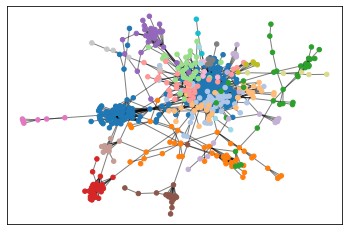

In [ ]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('tab20', max(partition_greedy.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition_greedy.keys(), node_size=20,
                       cmap=cmap, node_color=list(partition_greedy.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
partition_library = community_louvain.best_partition(G)

In [ ]:
partition_library

{' ': 0,
 "'Wichcraft": 1,
 'A': 0,
 'Aarón Sánchez': 1,
 'Acapulco': 6,
 'Al Brown New Zealand Chef': 3,
 'Alain Ducasse': 4,
 'Alberto Chicote': 13,
 'Alessandro Borghese': 3,
 'Alex Atala': 13,
 'Alex French Guy Cooking': 2,
 'Alex Guarnaschelli': 1,
 'Alfred Portale': 1,
 'Aliya LeeKong': 2,
 'Amandine Chaignot': 4,
 'Amy Thielen': 1,
 'Andy Luotto': 3,
 'Angel Leon Gonzalez': 13,
 'Angelo Sosa': 1,
 'Anis Nabilah': 2,
 'Anjali Pathak': 14,
 'Anne Burrell': 1,
 'Anne-Sophie Pic': 4,
 'Antonino Cannavacciuolo': 3,
 'Aquarium Restaurant - Nashville': 16,
 'Audra Morrice': 3,
 'Bahama Breeze Island Grille': 8,
 'Barbie Marshall': 2,
 'Ben Ebbrell - Sorted Chef': 2,
 'Ben Sargent & Dr. Klaw': 2,
 'Big Fernand': 6,
 'Big Fish Seafood Bistro_1': 16,
 'Big Fish Seafood Bistro_2': 16,
 'Blue Ribbon Fried Chicken': 1,
 'Blue Ribbon Restaurants': 1,
 'Bobby Flay': 1,
 "Bobby's Burger Palace": 2,
 'Bonefish Grill': 8,
 'Boston Market': 11,
 'Bradley Ogden': 1,
 'Brew Bistro and Lounge': 6,
 '

In [ ]:
print(list(partition_library.items())[0:20])

[('Lee Anne Wong', 14), ('KFC_3', 14), ('Chef Jamie Gwen', 1), ('Madison Cowan', 14), ('Elizabeth Karmel', 1), ('KFC_22', 14), ('KFC_8', 14), ('Pat Neely', 2), ('Logan Junior Chef', 2), ('Robin Miller', 1), ('Ben Sargent & Dr. Klaw', 2), ('Bobby Flay', 1), ('Chuck Hughes', 2), ('Chef Carlo Cracco', 3), ('Pasqualino Barbasso', 3), ('Alessandro Borghese', 3), ('Chef Hirohiko Shoda', 3), ('Alain Ducasse', 4), ('Christian Bau', 3), ('Andy Luotto', 3)]


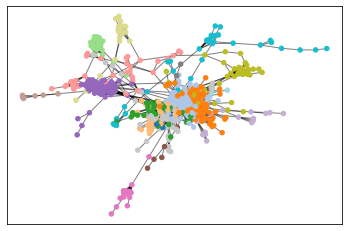

In [ ]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('tab20', max(partition_library.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition_library.keys(), node_size=20,
                       cmap=cmap, node_color=list(partition_library.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [ ]:
comms = set(partition_library.values())
comms



{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17}

In [ ]:
list_community_sets_library = [ set() for i in range(len(comms)) ]

In [ ]:
for n, comm in partition_library.items():
    list_community_sets_library[comm].add(n)

list_community_sets_library[0:2]

[{'Chick-fil-A', 'Roblé', 'Texas Roadhouse'},
 {"'Wichcraft",
  'Aarón Sánchez',
  'Alex Guarnaschelli',
  'Alfred Portale',
  'Amy Thielen',
  'Angelo Sosa',
  'Anne Burrell',
  'Blue Ribbon Fried Chicken',
  'Blue Ribbon Restaurants',
  'Bobby Flay',
  'Bradley Ogden',
  'Brooke Williamson',
  'Bryce Shuman',
  'Camille Becerra',
  'Cat Cora',
  'Cesare Casella',
  'Chef Alex Levin',
  'Chef Ben Churchill',
  'Chef Ben Ford',
  'Chef Billy Parisi',
  'Chef Carla Hall',
  'Chef Carmen Gonzalez',
  'Chef Casey Thompson',
  'Chef Charlie Palmer',
  'Chef Cynthia Louise',
  'Chef Daniel Boulud',
  'Chef David Burke',
  'Chef Elizabeth Falkner',
  'Chef Francois Payard',
  'Chef Jamie Gwen',
  'Chef Jet Tila',
  'Chef Kent Graham',
  'Chef Maeve Rochford',
  'Chef Marc Murphy',
  'Chef Marcela Valladolid',
  'Chef Mark Garcia',
  'Chef Mary Sue Milliken',
  'Chef Michael Ferraro',
  'Chef Michelle Bernstein',
  'Chef Nina Compton',
  'Chef Richard Sandoval',
  'Chef Rick Moonen',
  'Chef 

In [ ]:
for my_list in [list_community_sets_greedy,  list_community_sets_library]:
    
    #print("Coverage")
    print("Coverage", nx_comm.coverage(G, my_list))
    #print("Modularity")
    print("Modularity", nx_comm.modularity(G, my_list, weight='weight'))
    #print("Performance")
    print("Performance", nx_comm.performance(G, my_list))
    
    print("---")

Coverage 0.8686964795432921
Modularity 0.6331957195403588
Performance 0.8936682474334254
---
Coverage 0.845861084681256
Modularity 0.655844621723138
Performance 0.9072906352597843
---


In [ ]:


pairs = []
for i, nod in enumerate(list_community_sets_library):
    print(i,len(nod))
    comm_size = (i,len(nod))
    pairs.append(comm_size)



0 3
1 120
2 92
3 38
4 36
5 31
6 37
7 71
8 17
9 5
10 6
11 17
12 2
13 46
14 42
15 21
16 34
17 2


In [ ]:
pairs

[(0, 3),
 (1, 120),
 (2, 92),
 (3, 38),
 (4, 36),
 (5, 31),
 (6, 37),
 (7, 71),
 (8, 17),
 (9, 5),
 (10, 6),
 (11, 17),
 (12, 2),
 (13, 46),
 (14, 42),
 (15, 21),
 (16, 34),
 (17, 2)]

In [ ]:
community_index = []
number_of_nodes = []

for comm, n_nodes in pairs:
    community_index.append(str(comm))
    number_of_nodes.append(n_nodes)



Text(0, 0.5, 'Number of nodes')

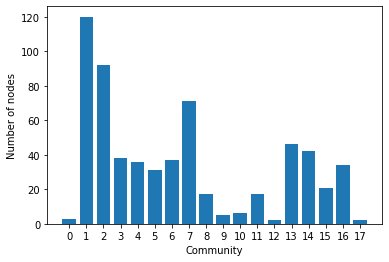

In [ ]:
plt.bar(community_index,number_of_nodes)
plt.xlabel("Community")
plt.ylabel("Number of nodes")